### Imports

In [ ]:
!pip install adjustText

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

import sys
from adjustText import adjust_text
from IPython.display import display, HTML

### Save NIFTY50 Data as CSV

In [ ]:
# list of stocks as of date 1 july 2023 under NIFTY50

TICKER_SECTOR_MAP = {
    'ADANIENT.NS': 'Conglomerate', 'ADANIPORTS.NS': 'Infrastructure', 'APOLLOHOSP.NS': 'Healthcare',
    'ASIANPAINT.NS': 'Consumer Goods', 'AXISBANK.NS': 'Financials', 'BAJAJ-AUTO.NS': 'Auto',
    'BAJFINANCE.NS': 'Financials', 'BAJAJFINSV.NS': 'Financials', 'BPCL.NS': 'Energy',
    'BHARTIARTL.NS': 'Telecom', 'BRITANNIA.NS': 'Consumer Goods', 'CIPLA.NS': 'Healthcare',
    'COALINDIA.NS': 'Energy', 'DIVISLAB.NS': 'Healthcare', 'DRREDDY.NS': 'Healthcare',
    'EICHERMOT.NS': 'Auto', 'GRASIM.NS': 'Materials', 'HCLTECH.NS': 'IT',
    'HDFCBANK.NS': 'Financials', 'HDFCLIFE.NS': 'Financials', 'HEROMOTOCO.NS': 'Auto',
    'HINDALCO.NS': 'Materials', 'HINDUNILVR.NS': 'Consumer Goods', 'ICICIBANK.NS': 'Financials',
    'ITC.NS': 'Consumer Goods', 'INDUSINDBK.NS': 'Financials', 'INFY.NS': 'IT',
    'JSWSTEEL.NS': 'Materials', 'KOTAKBANK.NS': 'Financials', 'LTIM.NS': 'IT',
    'LT.NS': 'Infrastructure', 'M&M.NS': 'Auto', 'MARUTI.NS': 'Auto',
    'NTPC.NS': 'Energy', 'NESTLEIND.NS': 'Consumer Goods', 'ONGC.NS': 'Energy',
    'POWERGRID.NS': 'Energy', 'RELIANCE.NS': 'Conglomerate', 'SBILIFE.NS': 'Financials',
    'SBIN.NS': 'Financials', 'SUNPHARMA.NS': 'Healthcare', 'TCS.NS': 'IT',
    'TATACONSUM.NS': 'Consumer Goods', 'TATAMOTORS.NS': 'Auto', 'TATASTEEL.NS': 'Materials',
    'TECHM.NS': 'IT', 'TITAN.NS': 'Consumer Goods', 'ULTRACEMCO.NS': 'Materials',
    'WIPRO.NS': 'IT', 'UPL.NS': 'Materials'
}

stocks = list(TICKER_SECTOR_MAP.keys())
data = yf.download(stocks, start='2020-01-01', end='2025-01-01', auto_adjust=False)['Adj Close']

# --- PREPROCESSING ---
data = data.dropna(axis=1, how='all')
data = data.dropna()

# Save for record
data.to_csv('nifty50_prices_2020_2025.csv')




print(f"\nData Ready: {data.shape}")
print("Dataset saved  as 'nifty50_prices_2020_2025.csv'")

[*********************100%***********************]  50 of 50 completed



Data Ready: (1238, 50)
Dataset saved  as 'nifty50_prices_2020_2025.csv'


# Analysis

## Preprocessing

In [ ]:

# path = '/content/nifty50_prices_2020_2025.csv'
# data = pd.read_csv(path, parse_dates=True)

' Either use above code or upload the file and paste the address here'

In [ ]:
print("Dataset Shape:", data.shape)
display(HTML('<style>table {display:block; overflow-x:auto; white-space:nowrap}</style>'))

print('\n\n DATA...........')
display(data.head())
print('\n\n DATA.DESCRIBE...........')
display(data.describe())


Dataset Shape: (1238, 50)




 DATA...........


Ticker,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,...,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,205.886536,362.584259,1404.969971,1705.415405,745.586914,2636.314209,935.214966,413.532166,433.316467,162.097198,...,408.711761,309.309662,181.187698,39.250175,1900.037964,602.617432,1132.704712,3942.765137,552.377441,116.644882
2020-01-02,209.204865,367.864899,1472.246094,1702.990356,753.802612,2611.960205,947.894348,414.973724,435.132690,160.745438,...,409.323517,308.832123,190.323227,40.685081,1891.315552,605.740906,1133.538574,4117.159180,559.138306,116.927414
2020-01-03,206.332260,367.240784,1463.823975,1665.661865,739.860840,2570.994385,931.964050,409.833038,435.037140,159.410110,...,418.404999,303.913361,187.720093,40.588577,1929.007812,612.897034,1117.942139,4092.328857,554.724915,118.245972
2020-01-06,197.664917,365.032532,1440.578003,1623.578125,720.242676,2542.204834,901.734070,390.604309,429.827362,154.678955,...,414.028900,298.087250,182.366486,39.711693,1928.832764,609.180603,1136.481323,4032.096191,549.278748,118.740417
2020-01-07,202.122421,369.449005,1456.534912,1639.983398,722.732300,2542.455811,907.014343,391.674469,425.477966,151.991882,...,420.098907,300.761536,181.433289,39.950840,1933.566040,614.478455,1137.805420,4114.540039,558.762756,120.176720




 DATA.DESCRIBE...........


Ticker,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,...,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
count,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,...,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000
mean,1905.427323,776.817174,4207.048795,2700.494270,818.271496,4557.546763,1335.620057,596.912685,803.509908,177.389496,...,933.456086,751.110537,473.476410,97.561944,3042.881182,1025.134708,2339.730516,7137.295224,598.975771,210.374844
std,1123.152776,335.399568,1654.462987,522.867475,230.122908,2437.669890,401.732900,150.540664,335.262763,58.297496,...,411.119002,234.227954,275.579586,39.935115,659.299304,314.067081,872.985728,2269.916698,122.976140,58.909295
min,120.607040,201.715088,1074.471558,1430.820068,301.889465,1692.601807,408.805328,179.162125,381.532715,91.406792,...,307.585663,216.330536,64.145065,21.292854,1448.124634,390.490753,785.659180,2927.345703,239.074036,76.761200
25%,1028.751038,618.257034,3024.504211,2439.231201,682.718323,3110.098694,995.233444,527.560013,535.169312,141.474781,...,599.704056,608.540482,292.790787,67.394863,2783.964905,832.756287,1495.600342,5822.332397,509.100510,183.420055
50%,1917.444702,727.468872,4389.782715,2874.274292,778.673767,3491.575073,1516.019531,655.199005,712.886261,155.998848,...,866.025818,747.965820,426.103012,102.560806,3086.910645,1001.234161,2438.279297,6999.050049,597.809021,202.085381
75%,2915.888794,859.432617,5148.870239,3077.287720,989.727203,4850.365479,1630.936676,709.265747,902.249695,176.952442,...,1117.831390,865.117065,619.111099,122.720388,3417.589478,1234.230011,3167.108704,8234.291748,707.175278,255.212479
max,4159.593750,1582.451172,7404.885254,3460.255127,1316.175171,12353.318359,2009.720825,807.790222,1756.416504,350.115143,...,1930.670654,1243.694336,1151.945801,175.839325,4389.965332,1745.885742,3842.475342,12007.786133,810.829468,341.901550


In [ ]:
# Data preprocessing
data = data.sort_index()

# keep only stocks present in sector mapping
sector_map = {t: TICKER_SECTOR_MAP[t] for t in data.columns if t in TICKER_SECTOR_MAP}

## Rolling volatility of stock returns

In [ ]:
log_returns = np.log(data / data.shift(1))

r_volt = log_returns.rolling(window=21).std() # 21 days window ~ 1 trading month
c_volt = r_volt.dropna(how='all')

features_df = c_volt.T
features_df = features_df.dropna()

# Standardizing the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_df)

print('\nRolling Volatility (Head):')
display(c_volt.head())



Rolling Volatility (Head):


Ticker,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,...,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-30,0.017715,0.011853,0.017315,0.012892,0.013026,0.007862,0.014988,0.017719,0.019795,0.015985,...,0.009949,0.027287,0.027610,0.019196,0.011658,0.010256,0.011865,0.014873,0.013129,0.012432
2020-01-31,0.017784,0.012383,0.015802,0.012944,0.012727,0.007914,0.015455,0.017715,0.019911,0.016870,...,0.010746,0.027214,0.027589,0.017580,0.013083,0.010285,0.011941,0.012621,0.014053,0.012828
2020-02-03,0.019672,0.012411,0.015981,0.014507,0.013516,0.009620,0.017212,0.017447,0.020492,0.016971,...,0.012624,0.027046,0.031568,0.017573,0.012506,0.010109,0.011446,0.012789,0.014690,0.012515
2020-02-04,0.016983,0.012838,0.015895,0.013056,0.012454,0.012816,0.018796,0.014882,0.020238,0.017963,...,0.013382,0.026336,0.031410,0.019216,0.012539,0.010970,0.019056,0.013043,0.015615,0.012832
2020-02-05,0.018904,0.012873,0.016162,0.013360,0.012756,0.012820,0.018797,0.014891,0.020324,0.020082,...,0.012888,0.027064,0.039377,0.022300,0.013268,0.010882,0.019043,0.012486,0.016553,0.012651


## Principal Component Analysis (PCA)

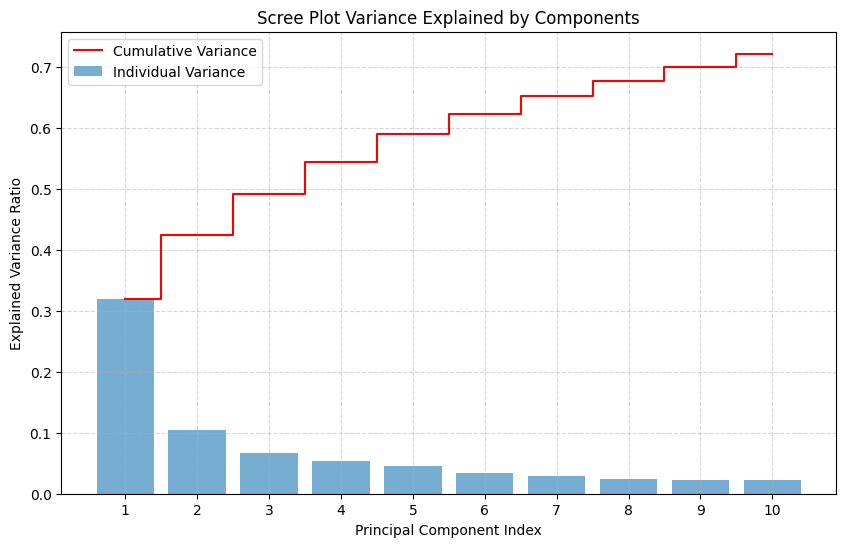

Variance explained by PC1: 31.89%
Variance explained by PC2: 10.51%
Variance explained by PC3: 6.68%
Total variance explained: 49.08%


In [ ]:
# Scree Plot
pca_scree = PCA(n_components=10)
pca_scree.fit(scaled_features)

variance = pca_scree.explained_variance_ratio_
cumulative_var = np.cumsum(variance)

plt.figure(figsize=(10, 6))
plt.bar(range(1, 11), variance, alpha=0.6, align='center', label='Individual Variance')
plt.step(range(1, 11), cumulative_var, where='mid', color='red', label='Cumulative Variance')

# Define Title
plot_title = 'Scree Plot Variance Explained by Components'

plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component Index')
plt.title(plot_title)
plt.xticks(range(1, 11))
plt.legend(loc='best')
plt.grid(True, linestyle='--', alpha=0.5)


plt.savefig("Scree_Plot.png", bbox_inches='tight')
plt.show()

# The Main Model (3 components)
pca = PCA(n_components=3)
principal_components = pca.fit_transform(scaled_features)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2','PC3'], index=features_df.index)
pca_df['Sector'] = pca_df.index.map(sector_map)

print(f"Variance explained by PC1: {pca.explained_variance_ratio_[0]:.2%}")
print(f"Variance explained by PC2: {pca.explained_variance_ratio_[1]:.2%}")
print(f"Variance explained by PC3: {pca.explained_variance_ratio_[2]:.2%}")
print(f"Total variance explained: {np.sum(pca.explained_variance_ratio_):.2%}")

## K-Means clustering on Principal components.



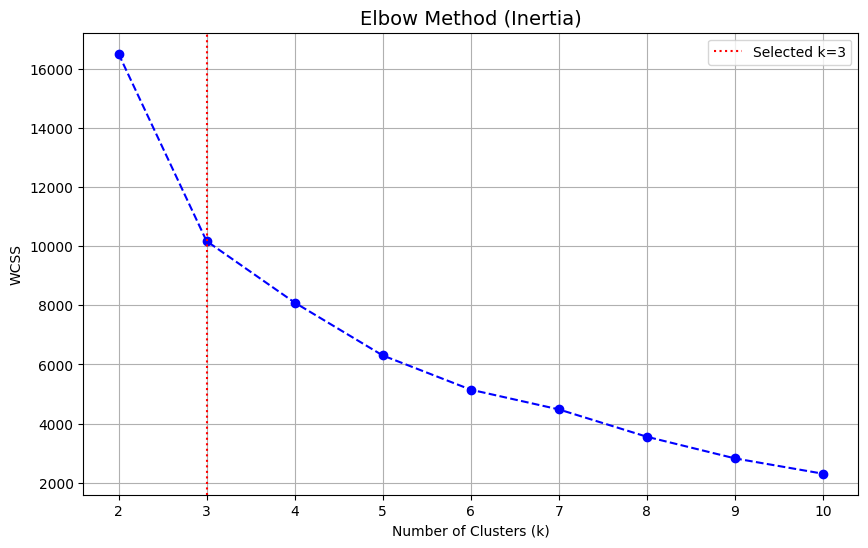

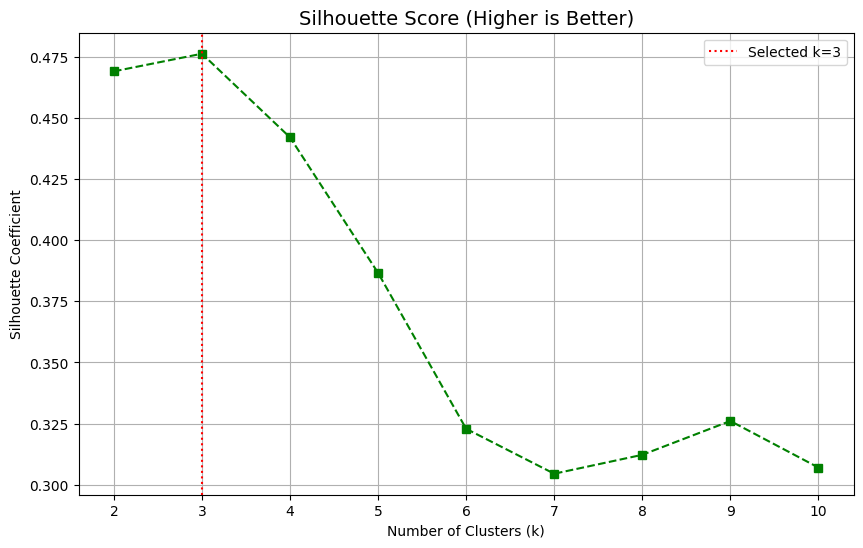

Selected k=3 (Silhouette Score: 0.476)


In [ ]:
wcss = []
sil_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans_test = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    labels = kmeans_test.fit_predict(principal_components)
    wcss.append(kmeans_test.inertia_)
    sil_scores.append(silhouette_score(principal_components, labels))

N_CLUSTERS = 3


# Elbow Method ---
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='--', color='b')

title_1 = 'Elbow Method (Inertia)'
plt.title(title_1, fontsize=14)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.axvline(x=N_CLUSTERS, color='r', linestyle=':', label=f'Selected k={N_CLUSTERS}')
plt.legend()

plt.savefig("Elbow_Method.png", bbox_inches='tight')
plt.show()


#Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(k_range, sil_scores, marker='s', linestyle='--', color='g')

title_2 = 'Silhouette Score (Higher is Better)'
plt.title(title_2, fontsize=14)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)
plt.axvline(x=N_CLUSTERS, color='r', linestyle=':', label=f'Selected k={N_CLUSTERS}')
plt.legend()


plt.savefig("Silhouette_Score.png", bbox_inches='tight')
plt.show()


#Model Fitting
print(f"Selected k={N_CLUSTERS} (Silhouette Score: {sil_scores[N_CLUSTERS-2]:.3f})")
kmeans = KMeans(n_clusters=N_CLUSTERS, init='k-means++', random_state=42, n_init=10)
pca_df['Cluster'] = kmeans.fit_predict(principal_components)

## Visualize cluster-wise volatility behaviour and sector grouping

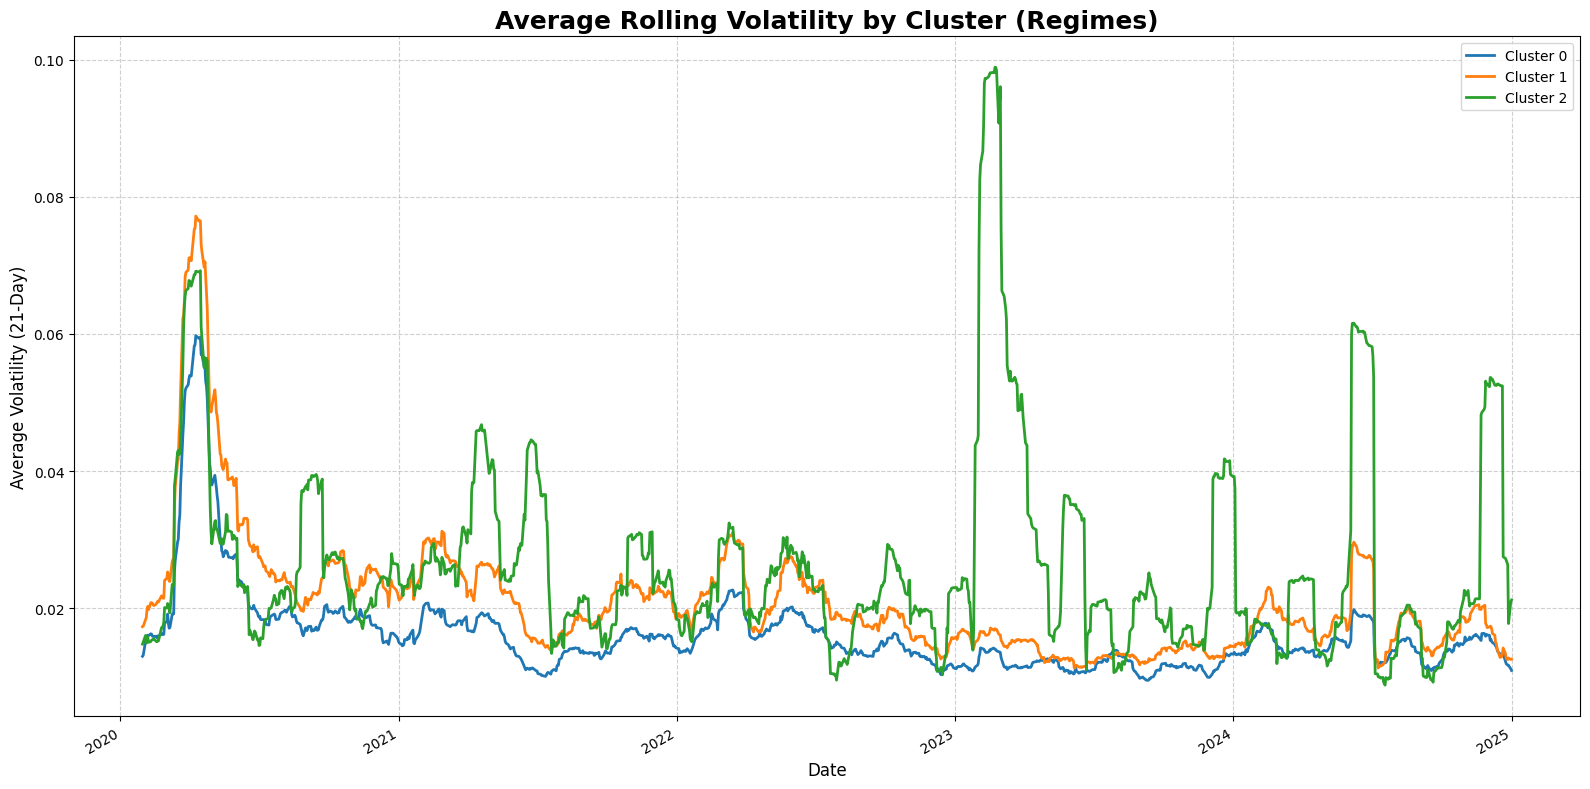

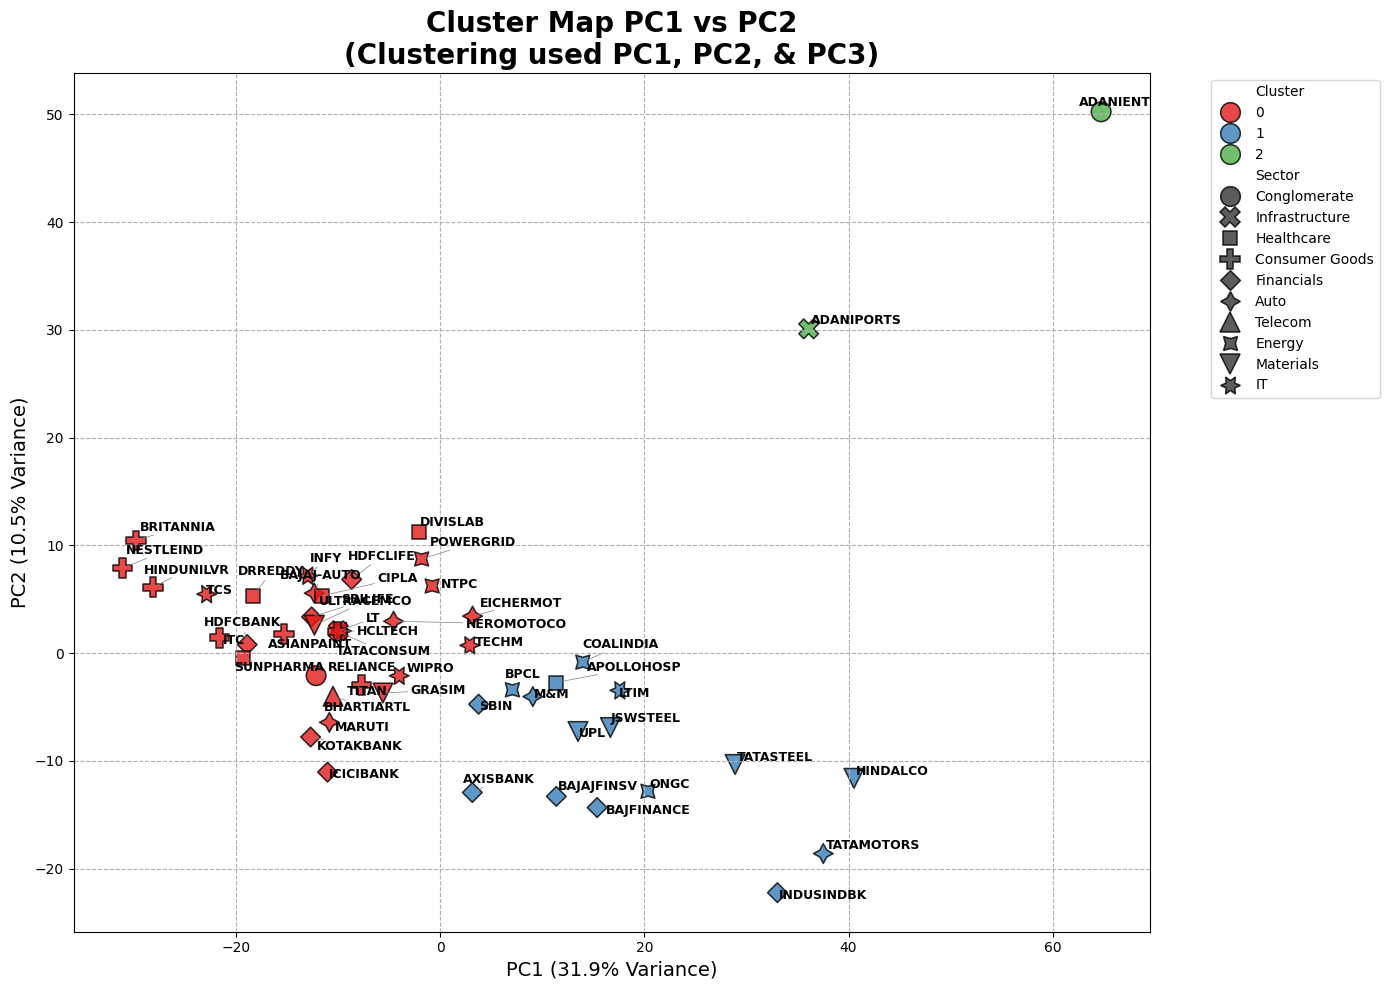

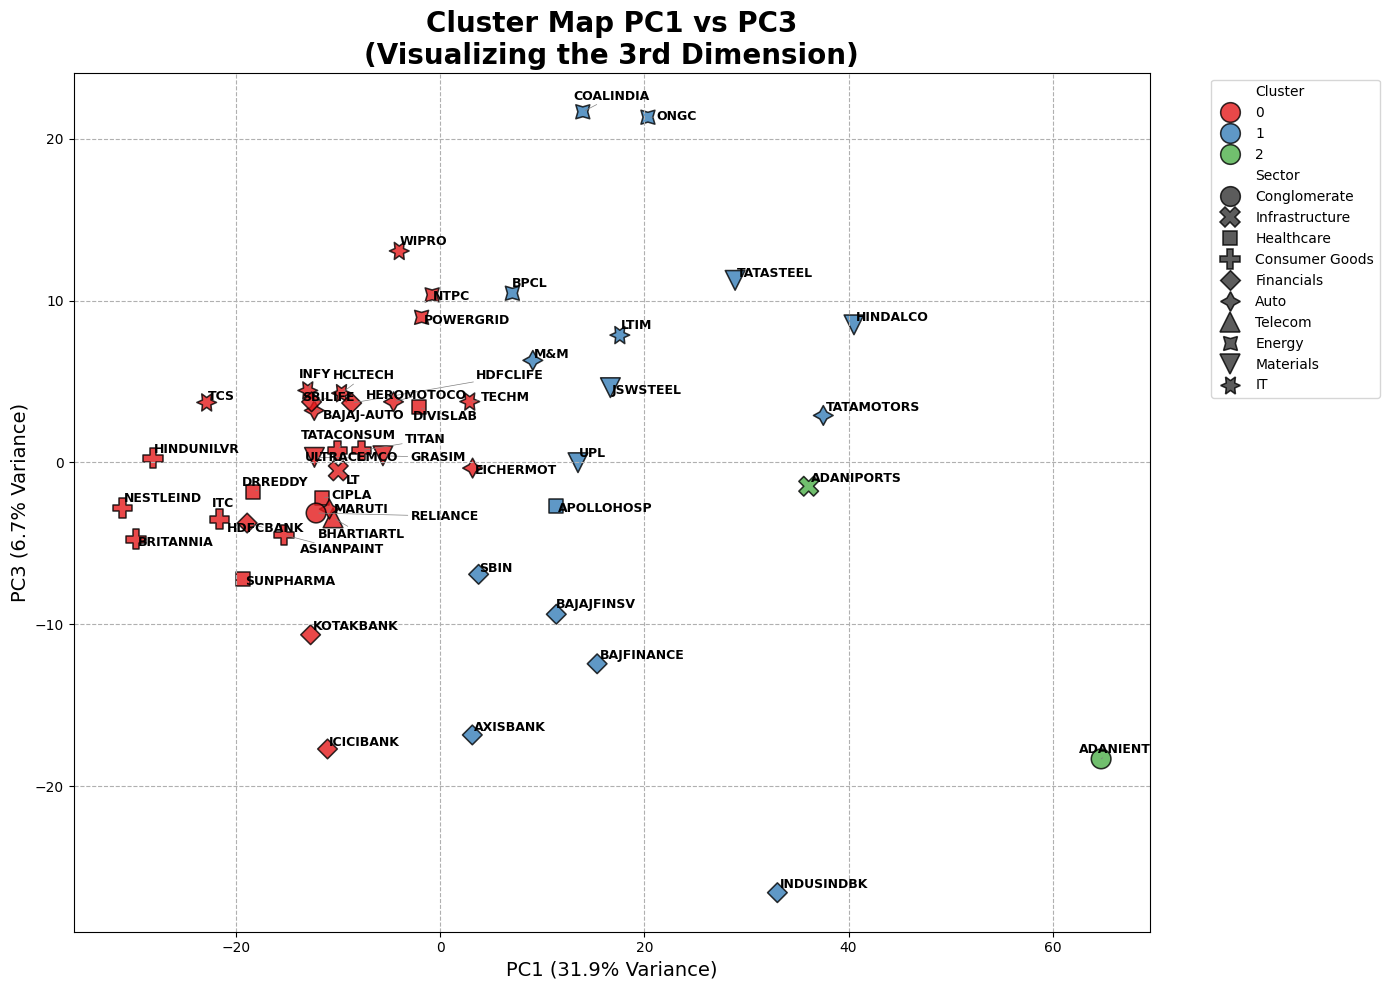

In [ ]:
#Time Series of Volatility
vol_data_time_index = features_df.T[pca_df.index]
cluster_map = pca_df['Cluster']
avg_cluster_vol_series = vol_data_time_index.T.groupby(cluster_map).mean().T
avg_cluster_vol_series.columns = [f'Cluster {c}' for c in avg_cluster_vol_series.columns]

plt.figure(figsize=(16, 8))
avg_cluster_vol_series.plot(ax=plt.gca(), linewidth=2)

#Title & Save
plot_title_1 = 'Average Rolling Volatility by Cluster'
plt.title(plot_title_1 + ' (Regimes)', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Volatility (21-Day)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.savefig("Avg_Rolling_Volatility_by_Cluster.png", bbox_inches='tight')
plt.show()

# PC1 vs PC2 Plot
plt.figure(figsize=(14, 10))
sns.scatterplot(
    data=pca_df, x='PC1', y='PC2', hue='Cluster', style='Sector',
    palette='Set1', s=200, alpha=0.8, edgecolor='black'
)

texts = []
for i, stock in enumerate(pca_df.index):
    texts.append(plt.text(pca_df['PC1'].iloc[i], pca_df['PC2'].iloc[i], stock.replace('.NS', ''), fontsize=9, fontweight='bold'))
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

#Title & Save
plot_title_2 = 'Cluster Map PC1 vs PC2'
plt.title(plot_title_2 + '\n(Clustering used PC1, PC2, & PC3)', fontsize=20, fontweight='bold')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} Variance)', fontsize=14)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} Variance)', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.grid(True, linestyle='--')
plt.tight_layout()


plt.savefig("Cluster_Map_PC1_vs_PC2.png", bbox_inches='tight')
plt.show()

#PC1 vs PC3 Plot
plt.figure(figsize=(14, 10))
sns.scatterplot(
    data=pca_df, x='PC1', y='PC3', hue='Cluster', style='Sector',
    palette='Set1', s=200, alpha=0.8, edgecolor='black'
)

texts_pc3 = []
for i, stock in enumerate(pca_df.index):
    texts_pc3.append(plt.text(pca_df['PC1'].iloc[i], pca_df['PC3'].iloc[i], stock.replace('.NS', ''), fontsize=9, fontweight='bold'))
adjust_text(texts_pc3, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

#Title & Save
plot_title_3 = 'Cluster Map PC1 vs PC3'
plt.title(plot_title_3 + '\n(Visualizing the 3rd Dimension)', fontsize=20, fontweight='bold')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} Variance)', fontsize=14)
plt.ylabel(f'PC3 ({pca.explained_variance_ratio_[2]:.1%} Variance)', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.grid(True, linestyle='--')
plt.tight_layout()

plt.savefig("Cluster_Map_PC2_vs_PC3.png", bbox_inches='tight')
plt.show()

## CLUSTER ANALYSIS FINAL REPORT


--- Cluster Groups ---
Cluster 0 (32 stocks): ASIANPAINT, BAJAJ-AUTO, BHARTIARTL, BRITANNIA, CIPLA, DIVISLAB, DRREDDY, EICHERMOT, GRASIM, HCLTECH, HDFCBANK, HDFCLIFE, HEROMOTOCO, HINDUNILVR, ICICIBANK, INFY, ITC, KOTAKBANK, LT, MARUTI, NESTLEIND, NTPC, POWERGRID, RELIANCE, SBILIFE, SUNPHARMA, TATACONSUM, TCS, TECHM, TITAN, ULTRACEMCO, WIPRO
Cluster 1 (16 stocks): APOLLOHOSP, AXISBANK, BAJAJFINSV, BAJFINANCE, BPCL, COALINDIA, HINDALCO, INDUSINDBK, JSWSTEEL, LTIM, M&M, ONGC, SBIN, TATAMOTORS, TATASTEEL, UPL
Cluster 2 (2 stocks): ADANIENT, ADANIPORTS

--- Sector Distribution (Counts) ---
Sector   Auto  Conglomerate  Consumer Goods  Energy  Financials  Healthcare  \
Cluster                                                                       
0           4             1               7       2           5           4   
1           2             0               0       3           5           1   
2           0             1               0       0           0           0   

Sector   IT

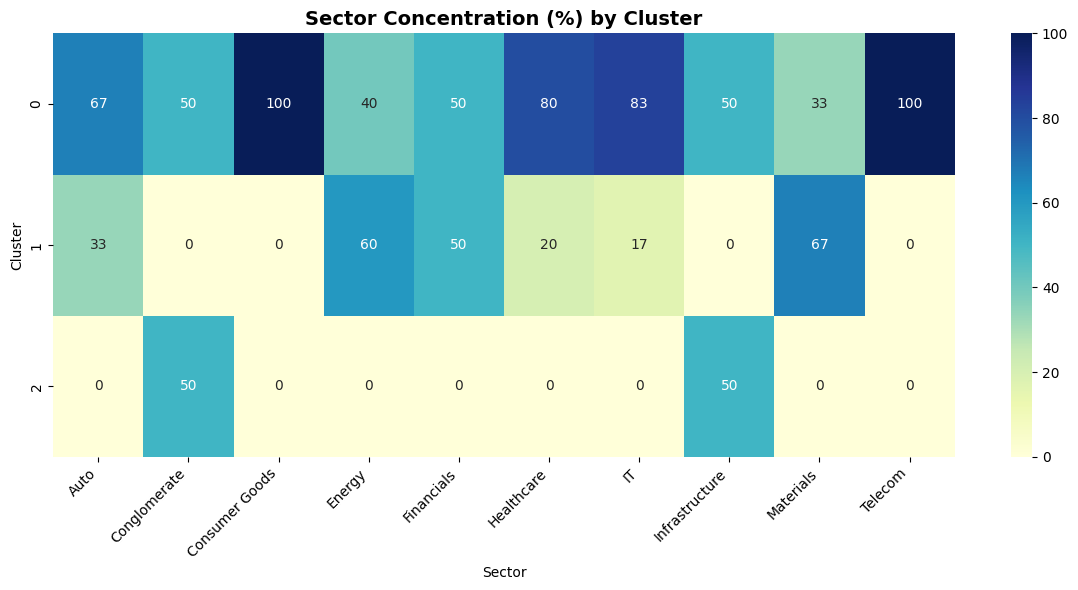


--- Sector Distribution (Percentages) ---
Sector   Auto  Conglomerate  Consumer Goods  Energy  Financials  Healthcare  \
Cluster                                                                       
0        66.7          50.0           100.0    40.0        50.0        80.0   
1        33.3           0.0             0.0    60.0        50.0        20.0   
2         0.0          50.0             0.0     0.0         0.0         0.0   

Sector     IT  Infrastructure  Materials  Telecom  
Cluster                                            
0        83.3            50.0       33.3    100.0  
1        16.7             0.0       66.7      0.0  
2         0.0            50.0        0.0      0.0  


In [ ]:
# Save Results
pca_df.to_csv("clusters_output.csv")

# Print Cluster Members
print("\n--- Cluster Groups ---")
for c in sorted(pca_df['Cluster'].unique()):
    stocks = pca_df[pca_df['Cluster'] == c].index.str.replace('.NS', '')
    print(f"Cluster {c} ({len(stocks)} stocks): {', '.join(stocks)}")

# Sector Counts
print("\n--- Sector Distribution (Counts) ---")
ct = pd.crosstab(pca_df['Cluster'], pca_df['Sector'])
print(ct)
ct.to_csv("sector_crosstab_output.csv")

# Heatmap Visualization
plt.figure(figsize=(12, 6))
ct_norm = pd.crosstab(pca_df['Cluster'], pca_df['Sector'], normalize='columns') * 100

sns.heatmap(ct_norm, annot=True, fmt='.0f', cmap="YlGnBu")

# Define Title
plot_title = 'Sector Concentration (%) by Cluster'
plt.title(plot_title, fontsize=14, fontweight='bold')

plt.xlabel('Sector')
plt.ylabel('Cluster')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

filename = plot_title.replace(' ', '_').replace('(%)', 'Percent') + ".png"
plt.savefig(filename, bbox_inches='tight')
print(f"Saved Plot: {filename}")

plt.show()

print("\n--- Sector Distribution (Percentages) ---")
print(ct_norm.round(1))
ct_norm.to_csv("sector_crosstab_normalized.csv")
